#Project Overview

The aim of this project is to classify if the client would go for term deposit or not based on the outcome on the bank marketing dataset. Two models, Random Forest and Neural Networks, are trained, and their performances are compared.

# Understanding the Dataset

In [79]:
import pandas as pd

In [80]:
dataset = pd.read_csv("/content/bank-full.csv", sep=';')

In [81]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [83]:
dataset['y'].value_counts()

,count
y,
no,39922
yes,5289


In [84]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


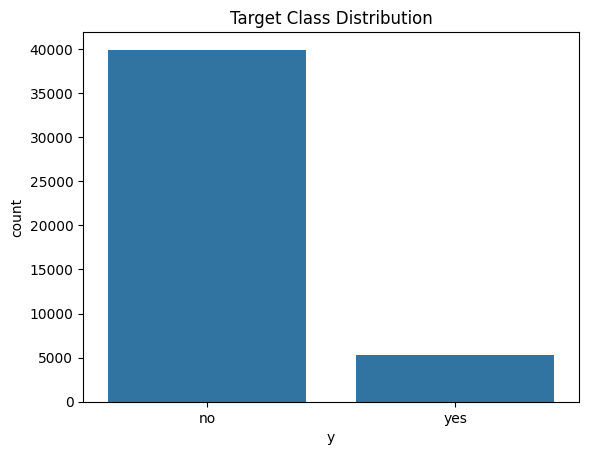

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y', data=dataset)
plt.title("Target Class Distribution")
plt.show()

In [86]:
dataset.duplicated().sum()

0

In [87]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [88]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

#Data Preprocessing and Cleaning

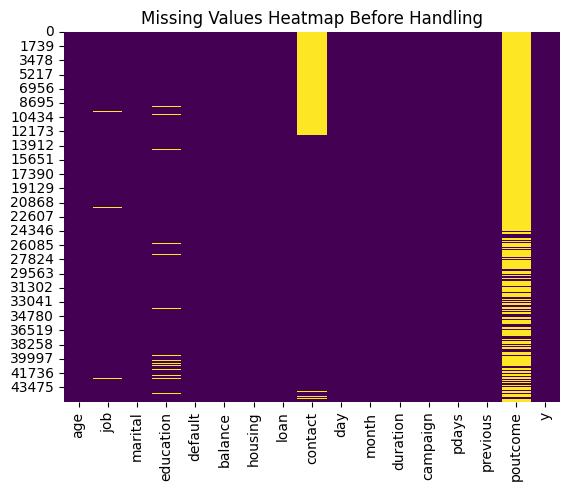

In [89]:
sns.heatmap(dataset.replace('unknown', pd.NA).isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap Before Handling")
plt.show()


In [90]:
dataset = dataset.replace('unknown', pd.NA)
dataset.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [91]:
dataset.isnull().sum()/len(dataset)*100

,0
age,0.000000
job,0.637013
marital,0.000000
education,4.107407
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,28.798301
day,0.000000


In [92]:
dataset = dataset.drop(columns=['poutcome'])
dataset = dataset.dropna(subset=['job'])
dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])
dataset['contact'] = dataset['contact'].fillna(dataset['contact'].mode()[0])

In [93]:
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


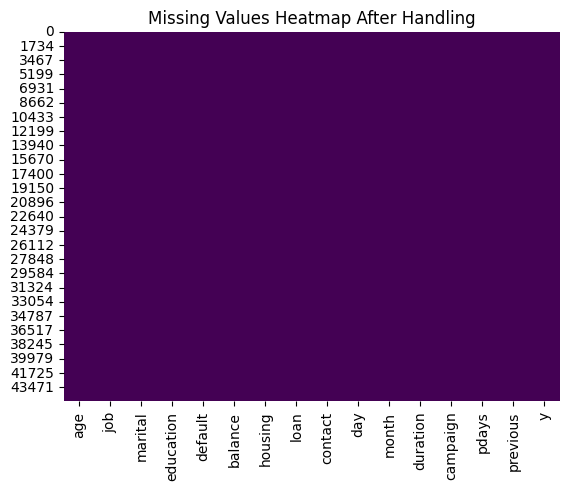

In [94]:
sns.heatmap(dataset.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap After Handling")
plt.show()


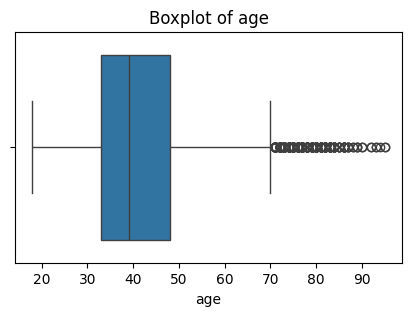

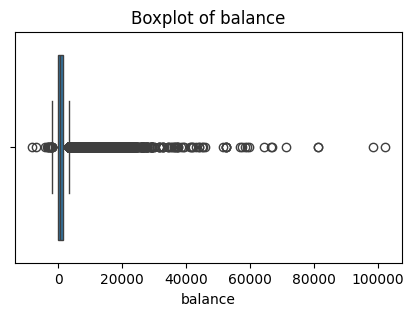

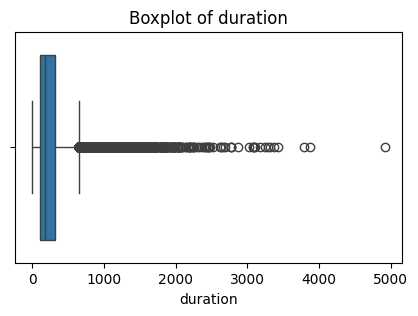

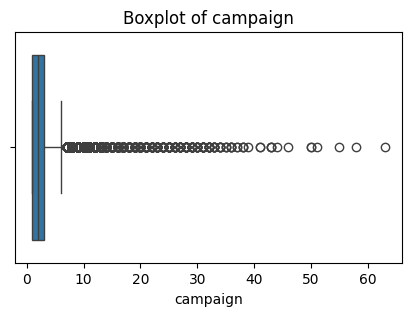

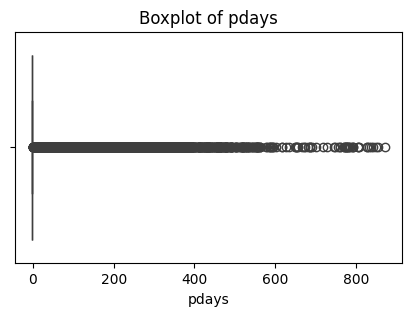

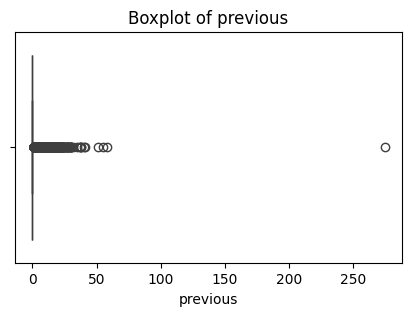

In [95]:
#Handle outliers

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataset[col], orient='h')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [96]:
# Identify Outliers Using Interquartile Range

Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((dataset[numeric_columns] < lower_bound) | (dataset[numeric_columns] > upper_bound)).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
age          480
balance     4712
duration    3217
campaign    3031
pdays       8224
previous    8224
dtype: int64


In [97]:
dataset = dataset[~((dataset[numeric_columns] < lower_bound) | (dataset[numeric_columns] > upper_bound)).any(axis=1)]

print("Dataset shape after removing outliers:", dataset.shape)

Dataset shape after removing outliers: (28006, 16)


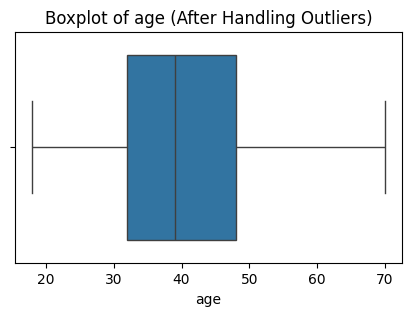

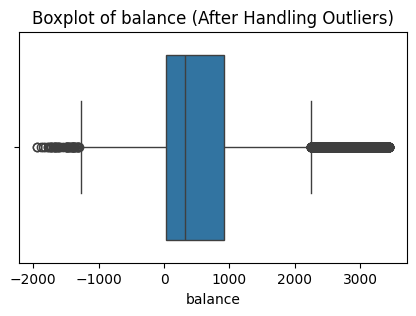

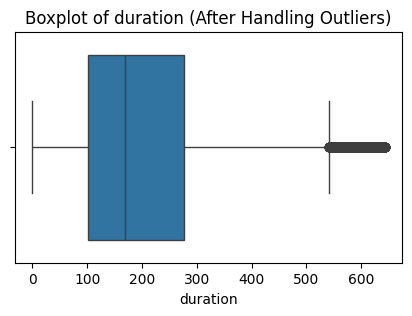

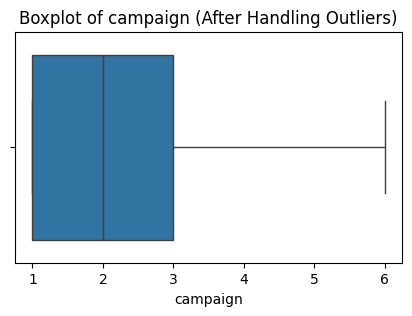

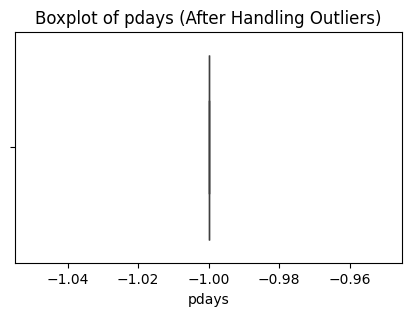

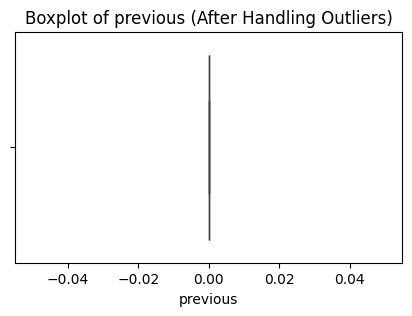

In [98]:
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dataset[col], orient='h')
    plt.title(f"Boxplot of {col} (After Handling Outliers)")
    plt.xlabel(col)
    plt.show()


In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['month'] = label_encoder.fit_transform(dataset['month'])

dataset['education'] = label_encoder.fit_transform(dataset['education'])

print("Encoded 'month' unique values:", dataset['month'].unique())
print("Encoded 'education' unique values:", dataset['education'].unique())
print(dataset['month'].isnull().sum())
print(dataset['education'].isnull().sum())

Encoded 'month' unique values: [ 8  6  5  1 10  9  2  4  3  7  0 11]
Encoded 'education' unique values: [2 1 0]
0
0


In [100]:
dataset_encoded = pd.get_dummies(dataset, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact'], drop_first=True)

dataset_encoded.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone
0,58,2,2143,5,8,261,1,-1,0,no,...,False,False,False,False,True,False,False,True,False,False
1,44,1,29,5,8,151,1,-1,0,no,...,False,False,True,False,False,True,False,True,False,False
2,33,1,2,5,8,76,1,-1,0,no,...,False,False,False,False,True,False,False,True,True,False
3,47,1,1506,5,8,92,1,-1,0,no,...,False,False,False,False,True,False,False,True,False,False
5,35,2,231,5,8,139,1,-1,0,no,...,False,False,False,False,True,False,False,True,False,False


In [101]:
dataset_encoded['y'] = label_encoder.fit_transform(dataset_encoded['y'])

X = dataset_encoded.drop('y', axis=1)
y = dataset_encoded['y']

# Balancing the Dataset Using SMOTE

In [102]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution After applying SMOTE:")
print(y_train_smote.value_counts())


Class Distribution After applying SMOTE:
y
0    21129
1    21129
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


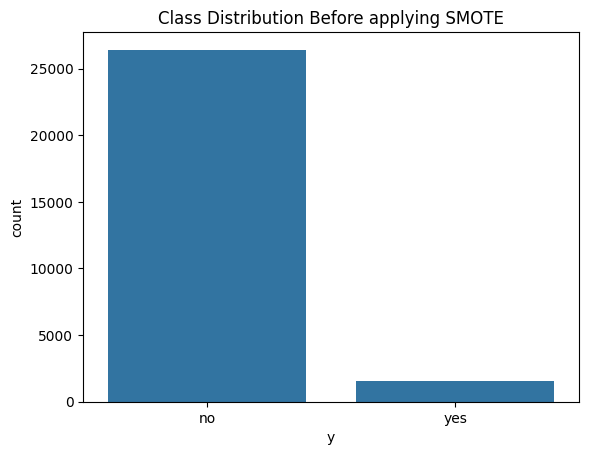

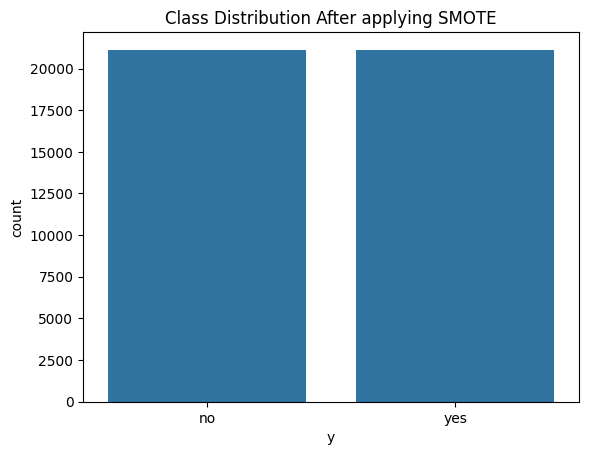

In [70]:
sns.countplot(x=y, data=dataset_encoded)
plt.title("Class Distribution Before applying SMOTE")
plt.show()
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After applying SMOTE")
plt.show()

## Min Max Scaling

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

print("Scaled Training Data (First 5 Rows):")
print(X_train_smote[:5])

Scaled Training Data (First 5 Rows):
[[0.40384615 0.         0.72568671 0.66666667 0.72727273 0.281493
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.        ]
 [0.55769231 0.5        0.61340015 0.6        0.09090909 0.09175739
  0.4        0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.15384615 0.5        0.36024499 0.4        0.72727273 0.281493
  0.8        0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         0.
  0.        ]
 [0.32692308 0.         0.37249443 0.2        0.45454545 0.37791602
  0.2        0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.     

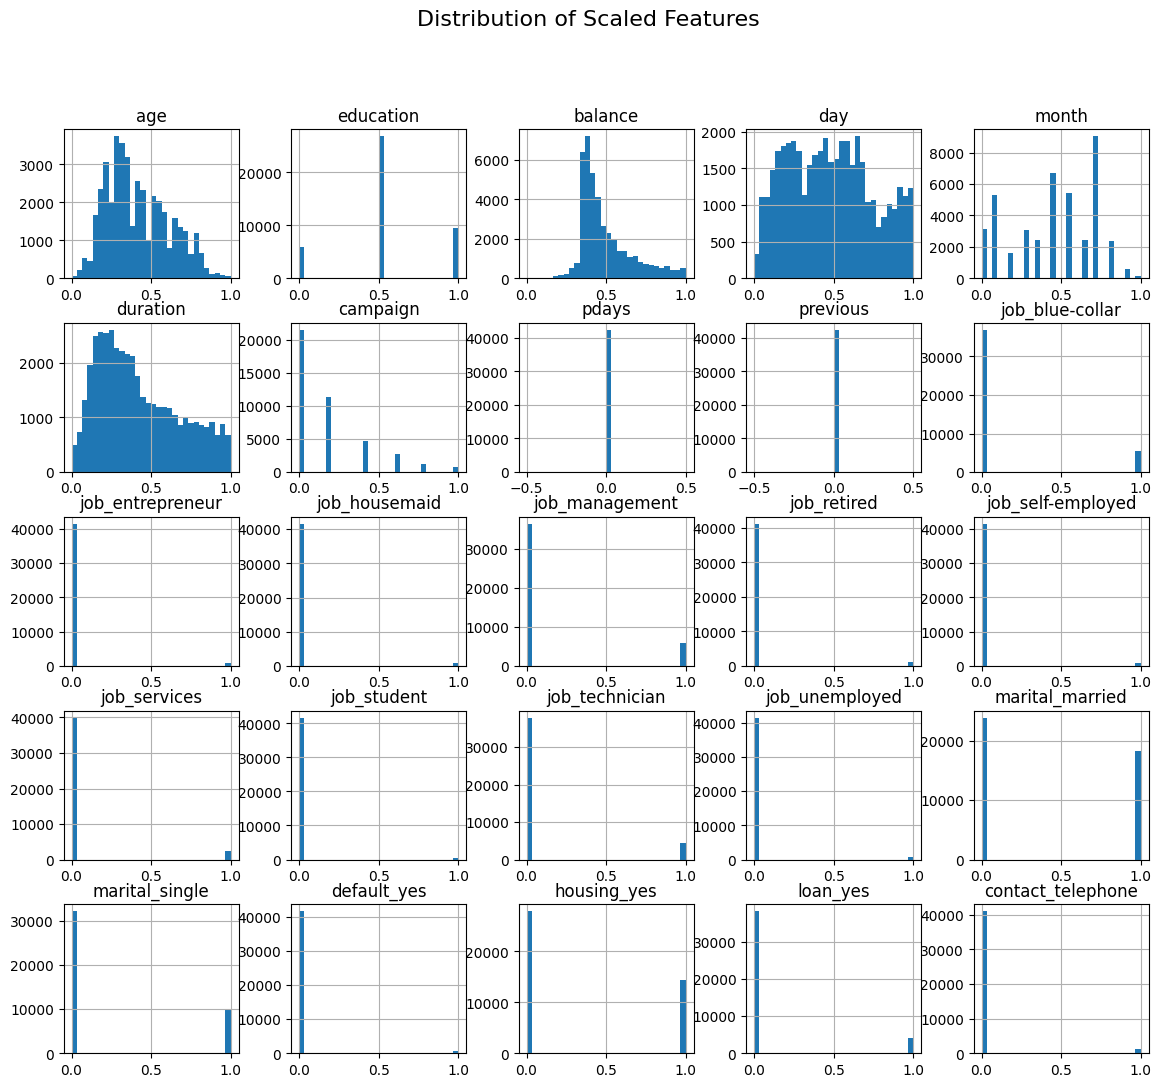

In [104]:
scaled_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

scaled_df.hist(figsize=(14, 12), bins=30)
plt.suptitle("Distribution of Scaled Features", fontsize=16)
plt.show()

In [105]:
print("Training Data Range:", X_train_smote.min(), X_train_smote.max())
print("Test Data Range:", X_test.min(), X_test.max())

Training Data Range: 0.0 1.0000000000000002
Test Data Range: 0.0 1.0000000000000002


In [106]:
print("Unique values in y_train_smote:", set(y_train_smote))
print("Unique values in y_test:", set(y_test))


Unique values in y_train_smote: {0, 1}
Unique values in y_test: {0, 1}


# Hyperparameter Tuning

## Random Forest Tuning

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}
Time taken for tuning: 0:04:10.100806
Best Random Forest model saved.
Tuned Random Forest Accuracy: 0.9284184219921456
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5286
           1       0.33      0.27      0.30       316

    accuracy                           0.93      5602
   macro avg       0.65      0.62      0.63      5602
weighted avg       0.92      0.93      0.92      5602



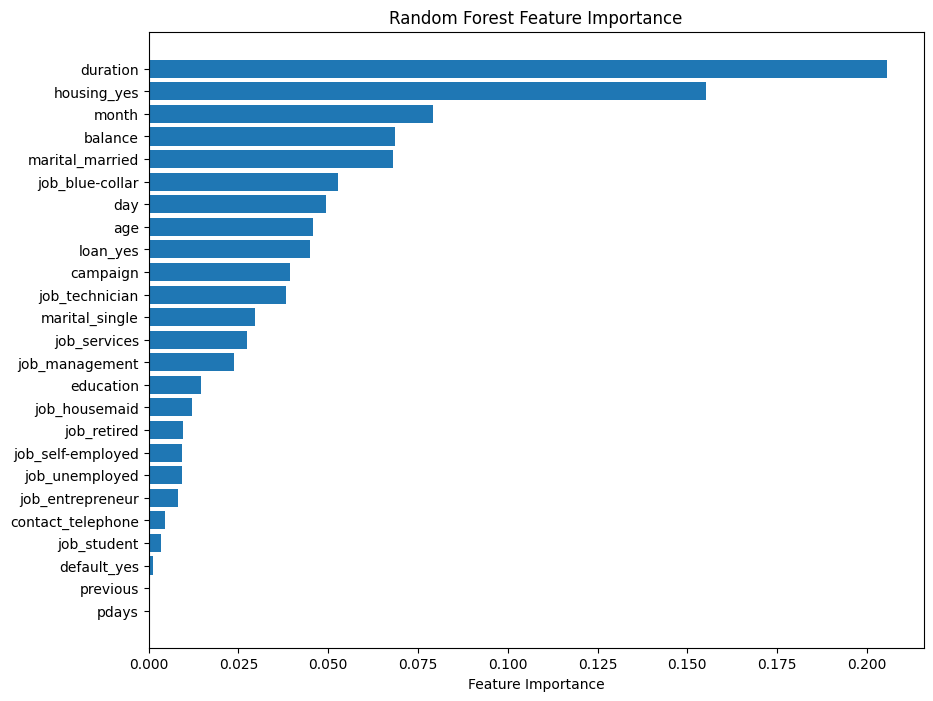

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import joblib


feature_names = X_train.columns

param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # Number of parameter combinations to try
    cv=3,                   # 3-fold cross-validation
    scoring='accuracy',     # Can use 'roc_auc' for imbalanced datasets
    verbose=2,              # Verbosity level
    n_jobs=-1,              # Use all available cores
    random_state=42
)

start_time = datetime.now()

random_search.fit(X_train_smote, y_train_smote)

end_time = datetime.now()

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print(f"Time taken for tuning: {end_time - start_time}")

joblib.dump(best_rf, 'best_random_forest.pkl')
print("Best Random Forest model saved.")

y_pred_rf_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_best))

feature_importance = best_rf.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


## Neural Network Tuning

In [108]:
!pip install keras-tuner

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X_train_smote = np.array(X_train_smote).astype(float)
y_train_smote = np.array(y_train_smote).astype(int)
X_test = np.array(X_test).astype(float)
y_test = np.array(y_test).astype(int)

X_train, X_val, y_train, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

def build_nn_model(hp):
    model = Sequential()

    # Adding hidden layers dynamically based on the hyperparameter tuning
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune layers (1–3)
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),  # Tune neurons (32–128)
            activation=hp.Choice('activation', values=['relu', 'tanh'])  # Tune activation function
        ))

    # Adding output layer for the binary classification
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize Keras Tuner for the hyperparameter optimization
tuner = RandomSearch(
    build_nn_model,
    objective='val_accuracy',
    max_trials=5,  # hyperparameter combinations to try
    executions_per_trial=1,
    directory='my_tuning_dir',
    project_name='nn_tuning'
)

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters for Neural Network:")
print(f"Number of Layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i+1} Units: {best_hps.get(f'units_{i}')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Activation Function: {best_hps.get('activation')}")

best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

y_pred_nn_tuned = (best_model.predict(X_test) > 0.5).astype(int)

print("\nTuned Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_tuned))
print("\nClassification Report for Tuned Neural Network:")
print(classification_report(y_test, y_pred_nn_tuned))


Trial 5 Complete [00h 01m 04s]
val_accuracy: 0.9204921722412109

Best val_accuracy So Far: 0.9217936396598816
Total elapsed time: 00h 05m 42s

Best Hyperparameters for Neural Network:
Number of Layers: 1
Layer 1 Units: 64
Learning Rate: 0.001601227482635775
Activation Function: relu
Epoch 1/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8832 - loss: 0.3310 - val_accuracy: 0.9090 - val_loss: 0.2236
Epoch 2/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9105 - loss: 0.2229 - val_accuracy: 0.9101 - val_loss: 0.2225
Epoch 3/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.2096 - val_accuracy: 0.9121 - val_loss: 0.2159
Epoch 4/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9162 - loss: 0.2102 - val_accuracy: 0.9135 - val_loss: 0.2124
Epoch 5/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9158 - loss: 0.2092 - val_accuracy: 0.9153 - val_loss: 0.2074
Epoch 6/20
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 

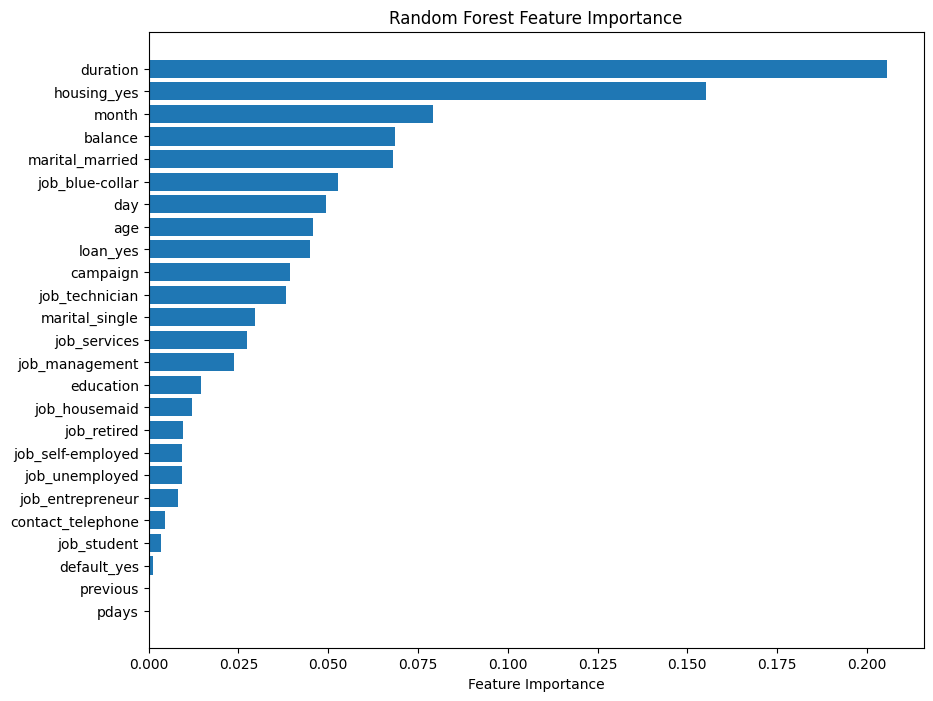

In [112]:
feat_impo = best_rf.feature_importances_
sorted_idx = feat_impo.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feat_impo[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

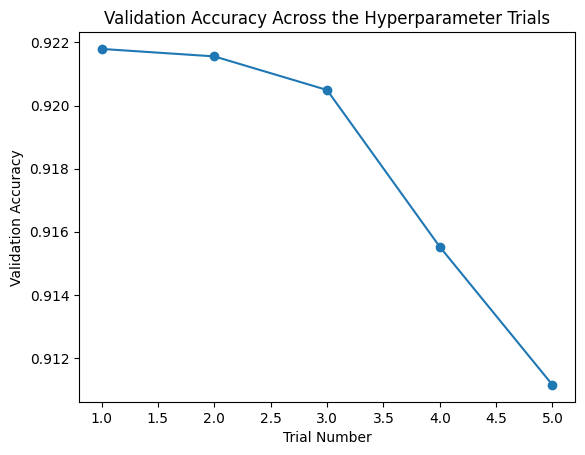

In [114]:
tuner_results = tuner.oracle.get_best_trials(num_trials=10)
val_accuracies = [trial.metrics.get_best_value('val_accuracy') for trial in tuner_results]

plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o')
plt.title("Validation Accuracy Across the Hyperparameter Trials")
plt.xlabel("Trial Number")
plt.ylabel("Validation Accuracy")
plt.show()


# Model Comparison

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_rf_best = y_pred_rf_best.astype(int)
y_pred_nn_tuned = y_pred_nn_tuned.astype(int)
y_test = y_test.astype(int)

#RF
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf_best),
    "Precision": precision_score(y_test, y_pred_rf_best),
    "Recall": recall_score(y_test, y_pred_rf_best),
    "F1-Score": f1_score(y_test, y_pred_rf_best)
}

# NN
nn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_nn_tuned),
    "Precision": precision_score(y_test, y_pred_nn_tuned),
    "Recall": recall_score(y_test, y_pred_nn_tuned),
    "F1-Score": f1_score(y_test, y_pred_nn_tuned)
}

comparison_df = pd.DataFrame([rf_metrics, nn_metrics], index=["Random Forest", "Neural Network"])
print("Model Comparison:")
print(comparison_df)


Model Comparison:
                Accuracy  Precision    Recall  F1-Score
Random Forest   0.928418   0.334630  0.272152  0.300175
Neural Network  0.893252   0.225681  0.367089  0.279518


# ROC-AUC Curve Comparison

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


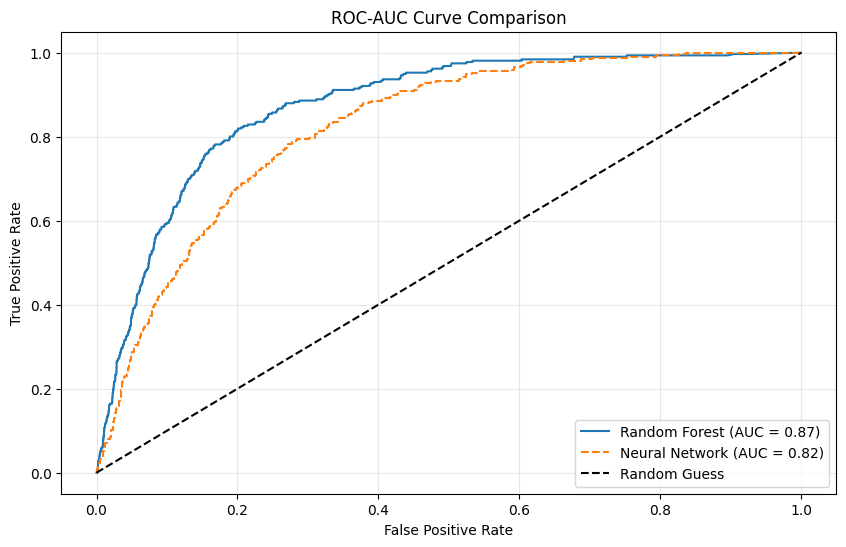

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_proba = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
auc_rf = roc_auc_score(y_test, rf_proba)

nn_proba = best_model.predict(X_test).flatten()
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_proba)
auc_nn = roc_auc_score(y_test, nn_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='-', marker=None)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})", linestyle='--', marker=None)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# Confusion Matrix Visualization

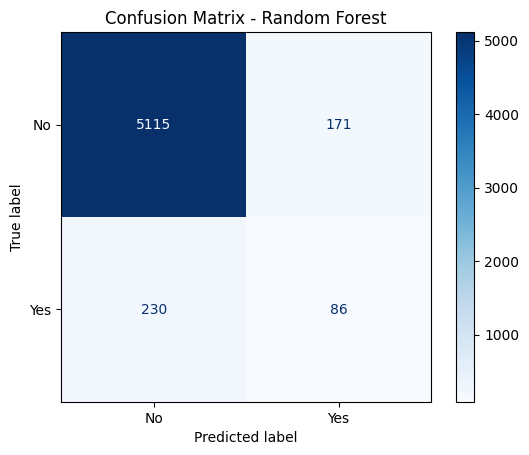

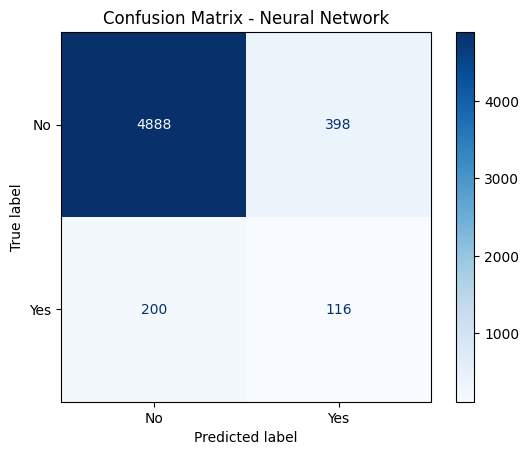

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_rf_best)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No', 'Yes'])
disp_rf.plot(cmap='Blues', values_format='d')  # Display the integer counts
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

cm_nn = confusion_matrix(y_test, y_pred_nn_tuned)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No', 'Yes'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Neural Network")
plt.grid(False)
plt.show()


In [143]:
final_predictions = pd.DataFrame({
    'Actual': y_test,
    'Random_Forest_Prediction': y_pred_rf_best,
    'Neural_Network_Prediction': y_pred_nn_tuned.flatten()
})

print("Final Predictions:")
print(final_predictions.head(25))

final_predictions.to_csv('final_predictions_comparison.csv', index=False)
print("\nFinal predictions saved to 'final_predictions_comparison.csv'")


Final Predictions:
    Actual  Random_Forest_Prediction  Neural_Network_Prediction
0        0                         0                          0
1        0                         0                          0
2        0                         0                          0
3        0                         0                          0
4        0                         0                          0
5        0                         0                          0
6        0                         0                          0
7        0                         0                          0
8        0                         0                          0
9        0                         0                          0
10       0                         0                          0
11       0                         1                          1
12       0                         0                          0
13       0                         0                          0
14       0           

In [ ]:
final_predictions.to_csv("final_predictions.csv", index=False)
print("Predictions saved successfully to 'final_predictions.csv'")